Emna Barred & Nabil Lamrabet

In [243]:
import numpy as np
np.set_printoptions(threshold=10000, suppress=True)
import pandas as pd
import time
import operator
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, FeatureUnion
import pickle
import warnings
from sklearn.impute import SimpleImputer as Imputer
warnings.filterwarnings('ignore')

# Apprentissage supervisé : Feature engineering et Classification

### 1. Chargement des données et préparation : 

Importer ce jeu de données avec la librairie pandas (c.f. read_csv)

In [2]:
cscores = pd.read_csv('./credit_scoring.csv', sep=';') 
cscores.head(5)

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0,1
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0,1
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0,0
3,0.0,1.0,60.0,24.0,1.0,1.0,0.0,63.0,182.0,2500.0,0.0,900.0,1325.0,1
4,0.0,1.0,36.0,26.0,1.0,1.0,0.0,46.0,107.0,0.0,0.0,310.0,910.0,1


Transformer votre jeu de données en numpy Array

In [3]:
cscores_numpy = cscores.values

In [4]:
print(cscores_numpy)

[[   9.    1.   60. ...  800.  846.    1.]
 [  17.    1.   60. ... 1000. 1658.    1.]
 [  10.    0.   36. ... 2000. 2985.    0.]
 ...
 [   0.    0.   24. ...  500.  963.    0.]
 [   0.    1.   48. ...  550.  550.    1.]
 [   5.    0.   60. ... 1350. 1650.    1.]]


séparer les variables caractéristiques de la variable à prédire

In [5]:
X = cscores_numpy[:,0:13]
Y = cscores_numpy[:,13-14]

Analyser les propriétés de vos données

In [6]:
Nsamples = cscores_numpy.shape[0]
print("Nous avons", Nsamples, "échantillons")

Nous avons 4375 échantillons


array([[<AxesSubplot:title={'center':'Status'}>]], dtype=object)

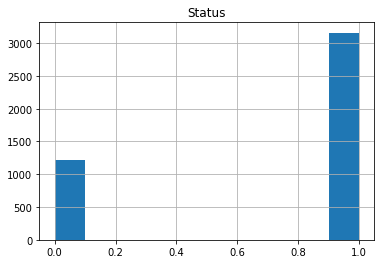

In [7]:
cscores.hist(column='Status')

In [8]:
GC = np.sum(Y==1)/len(Y) #good creditor
BC = np.sum(Y==0)/len(Y) #bad creditor

In [9]:
print("{0:.2f}%".format(GC * 100), " personnes ayant une bonne solvabilité .")
print("{0:.2f}%".format(BC * 100), " personnes ayant une mauvaise solvabilité .")

72.21%  personnes ayant une bonne solvabilité .
27.79%  personnes ayant une mauvaise solvabilité .


séparer les données en deux parties (de taille 50% chacune) 

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=1)

### 2. Apprentissage et évaluation de modèles : 

Algorithmes d’apprentissage supervisé

In [11]:
classifiers = [
    ("Cart", DecisionTreeClassifier(random_state=1)),
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("MLP", MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1)),
]

In [12]:
def testingClassifiers(x_train, x_test, y_train, y_test):
    accuracies = {}
    recalls = {}
    precisions = {}
    for cl in classifiers:
        classifier = cl[1].fit(x_train, y_train)
        y_pred = classifier.predict(x_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        confusion_mat = confusion_matrix(y_test, y_pred)
        
        accuracies[cl[0]] = accuracy
        recalls[cl[0]] = recall
        precisions[cl[0]] = precision
        
        print("Les indicateurs de ", cl[0], ":")
        print("- Accuracy :", "{0:.2f}%".format(accuracy * 100))
        print("- Rappel :", "{0:.2f}%".format(recall * 100))
        print("- Précision :", "{0:.2f}%".format(precision * 100))
        print("- Matrice de confusion :\n", confusion_mat)
        print("\n")
    
    accuracies = dict(sorted(accuracies.items(), key=operator.itemgetter(1),reverse=True))
    recalls = dict(sorted(recalls.items(), key=operator.itemgetter(1),reverse=True))
    precisions = dict(sorted(precisions.items(), key=operator.itemgetter(1),reverse=True))


    print("\n La meilleure Accuracy est donnée par l'algorithme ", list(accuracies.keys())[0], " à ", "{0:.2f}%".format(list(accuracies.values())[0]*100))
    print("\n Le meilleure rappel est donnée par l'algorithme ", list(recalls.keys())[0], " à ", "{0:.2f}%".format(list(recalls.values())[0]*100))
    print("\n La meilleure précision est donnée par l'algorithme ", list(precisions.keys())[0], " à ", "{0:.2f}%".format(list(precisions.values())[0]*100))

In [13]:
testingClassifiers(x_train, x_test, y_train, y_test)     

Les indicateurs de  Cart :
- Accuracy : 72.71%
- Rappel : 79.92%
- Précision : 81.94%
- Matrice de confusion :
 [[ 325  279]
 [ 318 1266]]


Les indicateurs de  KNN :
- Accuracy : 72.49%
- Rappel : 88.19%
- Précision : 77.10%
- Matrice de confusion :
 [[ 189  415]
 [ 187 1397]]


Les indicateurs de  MLP :
- Accuracy : 70.38%
- Rappel : 89.39%
- Précision : 74.68%
- Matrice de confusion :
 [[ 124  480]
 [ 168 1416]]



 La meilleure Accuracy est donnée par l'algorithme  Cart  à  72.71%

 Le meilleure rappel est donnée par l'algorithme  MLP  à  89.39%

 La meilleure précision est donnée par l'algorithme  Cart  à  81.94%


**Etant donné que la question est de donner un crédit à une personne qui pourrait potentiellement etre incapable de le rembourser, la précision est imporante.** 

**La précision permet de répondre à la question "Quelle proportion d'identifications positives était effectivement correcte ?" et dans notre cas, c'est imporant de savoir si on donne le crédit à une personne qui est "correctement positive" (quelqu'un qui a une bonne solvabilité).**

Par cette logique et sur les données brute, en excutant notre méthode qui teste les classifieurs, on peut dire que Cart est le plus adéquat. 

### 3. Normalisation des variables continues : 

Normalisation avec MinMaxScaler

In [14]:
MMScaler= MinMaxScaler()
MMScaler.fit(x_train)
x_train_norm = MMScaler.transform(x_train)
x_test_norm = MMScaler.transform(x_test)

In [15]:
testingClassifiers(x_train_norm, x_test_norm, y_train, y_test)     

Les indicateurs de  Cart :
- Accuracy : 72.85%
- Rappel : 80.11%
- Précision : 81.98%
- Matrice de confusion :
 [[ 325  279]
 [ 315 1269]]


Les indicateurs de  KNN :
- Accuracy : 74.54%
- Rappel : 85.10%
- Précision : 80.77%
- Matrice de confusion :
 [[ 283  321]
 [ 236 1348]]


Les indicateurs de  MLP :
- Accuracy : 78.88%
- Rappel : 88.70%
- Précision : 83.23%
- Matrice de confusion :
 [[ 321  283]
 [ 179 1405]]



 La meilleure Accuracy est donnée par l'algorithme  MLP  à  78.88%

 Le meilleure rappel est donnée par l'algorithme  MLP  à  88.70%

 La meilleure précision est donnée par l'algorithme  MLP  à  83.23%


***En testant les données normalisé avec MinMaxScaler, MLP est le plus adéquat.***

Normalisation avec StandardScaler

In [16]:
SScaler= StandardScaler()
SScaler.fit(x_train)
x_train_norm = SScaler.transform(x_train)
x_test_norm = SScaler.transform(x_test)
       

In [17]:
testingClassifiers(x_train_norm, x_test_norm, y_train, y_test)     

Les indicateurs de  Cart :
- Accuracy : 72.71%
- Rappel : 80.11%
- Précision : 81.82%
- Matrice de confusion :
 [[ 322  282]
 [ 315 1269]]


Les indicateurs de  KNN :
- Accuracy : 75.27%
- Rappel : 85.92%
- Précision : 81.06%
- Matrice de confusion :
 [[ 286  318]
 [ 223 1361]]


Les indicateurs de  MLP :
- Accuracy : 77.65%
- Rappel : 85.67%
- Précision : 83.82%
- Matrice de confusion :
 [[ 342  262]
 [ 227 1357]]



 La meilleure Accuracy est donnée par l'algorithme  MLP  à  77.65%

 Le meilleure rappel est donnée par l'algorithme  KNN  à  85.92%

 La meilleure précision est donnée par l'algorithme  MLP  à  83.82%


***En testant les données normalisé avec StandardScaler, MLP est le plus adéquat. Mais MinMaxScaler, nous donne une accuracy meilleure que StandardScaler. En prennant en compte l'accuracy et la précision des deux scalers, nous avons choisit MinMaxScaler***

In [18]:
x_train_norm = MMScaler.transform(x_train)
x_test_norm = MMScaler.transform(x_test)

### 4. Création de nouvelles variables caractéristiques par combinaisons linéaires des variables initiales :

In [33]:
pca = PCA(n_components=3)
pca.fit(x_train_norm)

x_train_pca = np.concatenate((x_train_norm, pca.transform(x_train_norm)), axis=1)
x_test_pca = np.concatenate((x_test_norm, pca.transform(x_test_norm)), axis=1)

x_train_pca.shape

(2187, 16)

In [34]:
testingClassifiers(x_train_pca, x_test_pca, y_train, y_test)     

Les indicateurs de  Cart :
- Accuracy : 72.21%
- Rappel : 79.48%
- Précision : 81.65%
- Matrice de confusion :
 [[ 321  283]
 [ 325 1259]]


Les indicateurs de  KNN :
- Accuracy : 74.45%
- Rappel : 85.23%
- Précision : 80.60%
- Matrice de confusion :
 [[ 279  325]
 [ 234 1350]]


Les indicateurs de  MLP :
- Accuracy : 79.25%
- Rappel : 88.95%
- Précision : 83.47%
- Matrice de confusion :
 [[ 325  279]
 [ 175 1409]]



 La meilleure Accuracy est donnée par l'algorithme  MLP  à  79.25%

 Le meilleure rappel est donnée par l'algorithme  MLP  à  88.95%

 La meilleure précision est donnée par l'algorithme  MLP  à  83.47%


***En testant les données ACP, MLP nous donne la meilleur précision et accuracy entre les trois classifieur.***

**Après avoir testé avec les données brutes, normalisés et ACP, nous avons choisit MLP avec les données ACP qui nous donnent le meilleur couple (accuracy, précision)**

### 5. Sélection de variables : 

In [35]:
features= np.concatenate((cscores.columns[:13],['PCA1','PCA2','PCA3']))
print(features)

['Seniority' 'Home' 'Time' 'Age' 'Marital' 'Records' 'Job' 'Expenses'
 'Income' 'Assets' 'Debt' 'Amount' 'Price' 'PCA1' 'PCA2' 'PCA3']


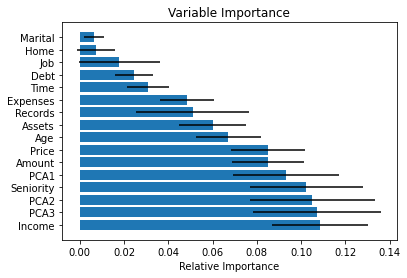

In [37]:
#histogramme des importances des variables
clf = RandomForestClassifier(n_estimators=500)
clf.fit(x_train_pca, y_train)

importances=clf.feature_importances_

std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)

sorted_idx = np.argsort(importances)[::-1]

padding = np.arange(x_train_pca.size/len(x_train_pca)) + 0.5

plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

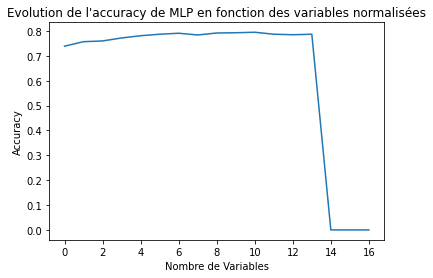

[0.739 0.757 0.76  0.772 0.781 0.787 0.791 0.784 0.792 0.793 0.795 0.787
 0.785 0.787 0.    0.    0.   ]


In [38]:
best_classifier = classifiers[2][1]

scores = np.zeros(x_train_pca.shape[1]+1)

for f in np.arange(0, x_train_norm.shape[1]+1):
    X1_f = x_train_pca[:,sorted_idx[:f+1]]
    X2_f = x_test_pca[:,sorted_idx[:f+1]] 
    best_classifier.fit(X1_f,y_train)
    y_pred=best_classifier.predict(X2_f) 
    scores[f]=np.round(accuracy_score(y_test,y_pred),3)

plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy de MLP en fonction des variables normalisées")
plt.show()
print(scores)

**Le nombre de variable à garder est 13**

In [345]:
best_var_number = 13
best_idx = sorted_idx[:best_var_number]

### 6. Paramétrage des classifieurs : 

In [348]:
parametres = {"n_neighbors" : range(30), 'algorithm': ['ball_tree', 'kd_tree', 'brute']}
model = KNeighborsClassifier()

GS= GridSearchCV(model, parametres, scoring='accuracy', cv=10)
grid= GS.fit(x_train_pca, y_train)
print(grid.best_params_)
print(grid.best_score_)

YKNN_O = grid.predict(x_test_pca)
print("Accuracy_score d'un KNN optimisé: {0:.3f}".format(accuracy_score(y_test, YKNN_O)))

{'algorithm': 'ball_tree', 'n_neighbors': 14}
0.769085920154162
Accuracy_score d'un KNN optimisé: 0.765


In [350]:
parametres = {"n_neighbors" : range(60), 'algorithm': ['ball_tree', 'kd_tree', 'brute']}
model = KNeighborsClassifier()

GS= GridSearchCV(model, parametres, scoring='accuracy', cv=10)
grid= GS.fit(x_train_pca[:,best_idx], y_train)
print(grid.best_params_)
print(grid.best_score_)

YKNN_O2 = grid.predict(x_test_pca[:,best_idx])
print("Accuracy_score d'un KNN optimisé: {0:.3f}".format(accuracy_score(y_test, YKNN_O2)))

{'algorithm': 'ball_tree', 'n_neighbors': 59}
0.7695341627916721
Accuracy_score d'un KNN optimisé: 0.761


### 7. Création d’un pipeline :

In [47]:
P = Pipeline([('mm', MinMaxScaler()), ('classifieur', MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1))])
P.fit(X, Y)
pickle.dump(P, open("pipeline.pkl", "wb"))

### 8. Comparaison de plusieurs algorithmes d’apprentissage : 

In [48]:
clfs = {
    "NaiveBayes": GaussianNB(),
    "Cart": DecisionTreeClassifier(random_state=1),
    "ID3": DecisionTreeClassifier(criterion="entropy"),
    "DecisionStump": BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5),
    "MLP": MLPClassifier(hidden_layer_sizes=(20, 10)),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Bagging": BaggingClassifier(n_estimators=50),
    "Adaboost": AdaBoostClassifier(n_estimators=50),
    "Randomforest": RandomForestClassifier(n_estimators=50)
}

In [51]:
def run_classifiers(cs, X, Y):
    kf = KFold(n_splits=10, shuffle=True, random_state=0) 
    scoring = {'accuracy' : make_scorer(accuracy_score), 
               'precision' : make_scorer(precision_score)}
    for c in cs:
        clf = cs[c]
        start_time = time.time()
        cv_acc = cross_val_score(clf, X, Y, cv=kf)
        cv_prs = cross_val_score(clf, X, Y, cv=kf, scoring='precision')
        exec_time = time.time() - start_time
        
        print("Temps d'éxecution de ", c ,":", "{0:.4f}".format(exec_time),"secondes")
        print("Accuracy for", c, "is: {1:.3f} +/- {2:.3f}".format(c, np.mean(cv_acc), np.std(cv_acc)))
        print("Precision for", c, "is: {1:.3f} +/- {2:.3f}".format(c, np.mean(cv_prs), np.std(cv_prs)))
        print("\n")

In [52]:
run_classifiers(clfs, X, Y)

Temps d'éxecution de  NaiveBayes : 0.0725 secondes
Accuracy for NaiveBayes is: 0.772 +/- 0.022
Precision for NaiveBayes is: 0.828 +/- 0.018


Temps d'éxecution de  Cart : 0.2976 secondes
Accuracy for Cart is: 0.727 +/- 0.025
Precision for Cart is: 0.808 +/- 0.022


Temps d'éxecution de  ID3 : 0.3230 secondes
Accuracy for ID3 is: 0.718 +/- 0.022
Precision for ID3 is: 0.813 +/- 0.023


Temps d'éxecution de  DecisionStump : 0.6447 secondes
Accuracy for DecisionStump is: 0.737 +/- 0.021
Precision for DecisionStump is: 0.743 +/- 0.016


Temps d'éxecution de  MLP : 7.4453 secondes
Accuracy for MLP is: 0.734 +/- 0.037
Precision for MLP is: 0.786 +/- 0.041


Temps d'éxecution de  KNN : 0.2879 secondes
Accuracy for KNN is: 0.715 +/- 0.017
Precision for KNN is: 0.767 +/- 0.019


Temps d'éxecution de  Bagging : 9.1752 secondes
Accuracy for Bagging is: 0.776 +/- 0.016
Precision for Bagging is: 0.825 +/- 0.016


Temps d'éxecution de  Adaboost : 2.4983 secondes
Accuracy for Adaboost is: 0.788 +/- 0.

**Conclusion** #TODO

# II. Apprentissage supervisé : Données hétérogènes

### • Chargement des données et préparation :

In [157]:
credit = pd.read_csv("./credit.data", sep="\s+", header=None )
credit.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [218]:
credit_numpy = credit.values
credit_numpy.shape

(688, 16)

In [244]:
Xcred = credit_numpy[:, 0:15] #variables caractéristiques
Ycred = credit_numpy[:, 15:16] #target

In [224]:
credit2 = credit[[1, 2, 7, 10, 13, 14]]
credit2

,1,2,7,10,13,14
0,30.83,0.000,1.25,1,202,0
1,58.67,4.460,3.04,6,43,560
2,24.50,0.500,1.50,0,280,824
3,27.83,1.540,3.75,5,100,3
4,20.17,5.625,1.71,0,120,0
...,...,...,...,...,...,...
683,21.08,10.085,1.25,0,260,0
684,22.67,0.750,2.00,2,200,394
685,25.25,13.500,2.00,1,200,1
686,17.92,0.205,0.04,0,280,750


In [225]:
credit2 = credit2.replace('?', np.NaN)

In [226]:
credit2 = credit2.astype(float)

In [227]:
rows_with_nan = []
for index, row in credit2.iterrows():
    is_nan_series = row.isnull()
    if is_nan_series.any():
        rows_with_nan.append(index)

print(rows_with_nan)

[71, 83, 86, 92, 97, 241, 252, 268, 276, 284, 327, 328, 404, 443, 448, 454, 498, 513, 590, 606, 620, 624]


In [228]:
n1 = credit2.shape[0]
print(n1, 'echantillons avec données manquantes')

688 echantillons avec données manquantes


In [229]:
credit2 = credit2.drop(rows_with_nan)
n2 = credit2.shape[0]
print(n2, 'echantillons sans données manquantes')
print('nous avons supprimé', n1 - n2, 'individus')

666 echantillons sans données manquantes
nous avons supprimé 22 individus


array([[<AxesSubplot:title={'center':'15'}>]], dtype=object)

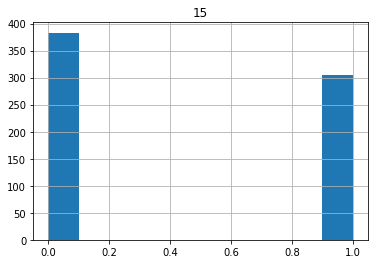

In [230]:
app_dis = credit.replace('+', 1)
app_dis = app_dis.replace('-', 0)
app_dis.hist(15)

In [231]:
approved = np.sum(Ycred=='+')/len(Ycred)
disapproved = np.sum(Ycred=='-')/len(Ycred) 

In [232]:
print("{0:.2f}%".format(approved * 100), "des demandes de crédits on été acceptés.")
print("{0:.2f}%".format(disapproved * 100), "des demandes de crédits on été refusés.")

44.33% des demandes de crédits on été acceptés.
55.67% des demandes de crédits on été refusés.


In [233]:
Ycred[Ycred == '+'] = '1'
Ycred[Ycred == '-'] = '0'
Ycred = Ycred.astype(int)

### • Normalisation des variables continues : 

In [245]:
credit2_numpy = credit2.values
Xcred2 = credit2_numpy[:, 1:]

In [246]:
S_Scaler= StandardScaler()
S_Scaler.fit(Xcred2)
x_norm = S_Scaler.transform(Xcred2)

In [247]:
Ycred2 = np.delete(Ycred, rows_with_nan)
Ycred2.shape

(666,)

In [248]:
run_classifiers(clfs, x_norm, Ycred2)

Temps d'éxecution de  NaiveBayes : 0.0611 secondes
Accuracy for NaiveBayes is: 0.718 +/- 0.047
Precision for NaiveBayes is: nan +/- nan


Temps d'éxecution de  Cart : 0.0493 secondes
Accuracy for Cart is: 0.718 +/- 0.052
Precision for Cart is: nan +/- nan


Temps d'éxecution de  ID3 : 0.0442 secondes
Accuracy for ID3 is: 0.742 +/- 0.051
Precision for ID3 is: nan +/- nan


Temps d'éxecution de  DecisionStump : 0.2189 secondes
Accuracy for DecisionStump is: 0.760 +/- 0.055
Precision for DecisionStump is: nan +/- nan


Temps d'éxecution de  MLP : 3.6696 secondes
Accuracy for MLP is: 0.775 +/- 0.040
Precision for MLP is: nan +/- nan


Temps d'éxecution de  KNN : 0.0716 secondes
Accuracy for KNN is: 0.722 +/- 0.061
Precision for KNN is: nan +/- nan


Temps d'éxecution de  Bagging : 1.4872 secondes
Accuracy for Bagging is: 0.784 +/- 0.043
Precision for Bagging is: nan +/- nan


Temps d'éxecution de  Adaboost : 1.2565 secondes
Accuracy for Adaboost is: 0.784 +/- 0.045
Precision for Adaboost i

**conlusion** #TODO

### • Traitement de données manquantes :

In [252]:
#Récupération et transfomation des colonnes catégorielles 
#en valeurs numériques 
col_cat = [0, 3, 4, 5, 6, 8, 9, 11, 12]
X_cat = np.copy(Xcred[:, col_cat]) 
for col_id in range(len(col_cat)):
    unique_val, val_idx = np.unique(X_cat[:, col_id], return_inverse=True) 
    X_cat[:, col_id] = val_idx

In [239]:
#Imputation avec most_frequent pour les variables catégorielles
imp_cat = Imputer(missing_values=0, strategy='most_frequent') 
X_cat[:, range(5)] = imp_cat.fit_transform(X_cat[:, range(5)])

In [249]:
#encodage des variables catégorielle avec OneHotEncoder
X_cat_bin = OneHotEncoder().fit_transform(X_cat).toarray()

In [257]:
X_cat_bin.shape

(688, 40)

In [240]:
#Récupération des colonnes numériques et remplacement des valeurs
#manquantes par NaN 
col_num= [1, 2, 7, 13, 14]

X_num = np.copy(Xcred[:, col_num]) 
X_num[X_num == '?'] = np.nan 
X_num = X_num.astype(float)


In [254]:
#Imputation avec mean pour les variables continues
imp_num = Imputer(missing_values=np.nan, strategy='mean') 
X_num = imp_num.fit_transform(X_num)


In [255]:
#normalisation des variables numériques
S_Scaler= StandardScaler()
S_Scaler.fit(X_num)
x_num_norm = S_Scaler.transform(X_num)

In [258]:
x_num_norm.shape

(688, 5)

In [263]:
#Construction de votre jeu de données 
x_final= np.concatenate((X_cat_bin, x_num_norm), axis = 1)
x_final.shape

(688, 45)

In [264]:
run_classifiers(clfs, x_final, Ycred)

Temps d'éxecution de  NaiveBayes : 0.0618 secondes
Accuracy for NaiveBayes is: 0.677 +/- 0.054
Precision for NaiveBayes is: nan +/- nan


Temps d'éxecution de  Cart : 0.0676 secondes
Accuracy for Cart is: 0.824 +/- 0.051
Precision for Cart is: nan +/- nan


Temps d'éxecution de  ID3 : 0.0599 secondes
Accuracy for ID3 is: 0.818 +/- 0.050
Precision for ID3 is: nan +/- nan


Temps d'éxecution de  DecisionStump : 0.2810 secondes
Accuracy for DecisionStump is: 0.859 +/- 0.030
Precision for DecisionStump is: nan +/- nan


Temps d'éxecution de  MLP : 5.1734 secondes
Accuracy for MLP is: 0.859 +/- 0.042
Precision for MLP is: nan +/- nan


Temps d'éxecution de  KNN : 0.0663 secondes
Accuracy for KNN is: 0.842 +/- 0.047
Precision for KNN is: nan +/- nan


Temps d'éxecution de  Bagging : 1.9854 secondes
Accuracy for Bagging is: 0.871 +/- 0.037
Precision for Bagging is: nan +/- nan


Temps d'éxecution de  Adaboost : 1.3264 secondes
Accuracy for Adaboost is: 0.842 +/- 0.021
Precision for Adaboost i

**conclusion** TODO

# III. Apprentissage supervisé sur des données textuelles : Feature engineering et Classification

In [427]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

In [339]:
smsData = pd.read_csv("./SMSSpamCollection.data", sep='\t', names=['Classe', 'Message'])
smsData.head()

,Classe,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [396]:
target = smsData['Classe']
target[target == 'ham'] = '1'
target[target == 'spam'] = '0'
target = target.astype(int)
target

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Classe, Length: 5572, dtype: int64

In [340]:
messages = smsData['Message'].tolist()
messages

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had you

### • CountVectorizer 

In [483]:
#tokenize and count the word occurrences in the messages
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(messages)
nwords1 = X.shape[1]
print(nwords1, 'mots avant suppression des stop words')

8713 mots avant suppression des stop words


In [484]:
#supprimer les mots clés vides (stopwords) 
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(messages)
nwords2 = X.shape[1]
print(nwords1 - nwords2, 'stop words ont été trouvé et supprimés. Ce qui nous laisse avec', nwords2, 'mots.')

269 stop words ont été trouvé et supprimés. Ce qui nous laisse avec 8444 mots.


In [485]:
# calculer la matrice de co-occurences.
occ_mat = X

In [487]:
run_classifiers(clfs, occ_mat, target)

Temps d'éxecution de  NaiveBayes : 0.0575 secondes
Accuracy for NaiveBayes is: nan +/- nan
Precision for NaiveBayes is: nan +/- nan


Temps d'éxecution de  Cart : 2.2770 secondes
Accuracy for Cart is: 0.972 +/- 0.007
Precision for Cart is: 0.978 +/- 0.008


Temps d'éxecution de  ID3 : 2.0921 secondes
Accuracy for ID3 is: 0.968 +/- 0.004
Precision for ID3 is: 0.976 +/- 0.005


Temps d'éxecution de  DecisionStump : 3.3427 secondes
Accuracy for DecisionStump is: 0.893 +/- 0.013
Precision for DecisionStump is: 0.889 +/- 0.013


Temps d'éxecution de  MLP : 34.6562 secondes
Accuracy for MLP is: 0.985 +/- 0.004
Precision for MLP is: 0.982 +/- 0.004


Temps d'éxecution de  KNN : 0.8837 secondes
Accuracy for KNN is: 0.914 +/- 0.013
Precision for KNN is: 0.910 +/- 0.014


Temps d'éxecution de  Bagging : 74.3127 secondes
Accuracy for Bagging is: 0.975 +/- 0.007
Precision for Bagging is: 0.978 +/- 0.008


Temps d'éxecution de  Adaboost : 21.9198 secondes
Accuracy for Adaboost is: 0.970 +/- 0.006
P

**conlusion** #TODO

### • Tf–idf term weighting

In [388]:
transformer = TfidfTransformer(smooth_idf=False)

In [410]:
tfidf = transformer.fit_transform(occ_mat)

In [417]:
run_classifiers(clfs, tfidf, target)

Temps d'éxecution de  NaiveBayes : 0.0232 secondes
Accuracy for NaiveBayes is: nan +/- nan
Precision for NaiveBayes is: nan +/- nan


Temps d'éxecution de  Cart : 3.5304 secondes
Accuracy for Cart is: 0.969 +/- 0.009
Precision for Cart is: 0.978 +/- 0.007


Temps d'éxecution de  ID3 : 3.5165 secondes
Accuracy for ID3 is: 0.967 +/- 0.004
Precision for ID3 is: 0.978 +/- 0.005


Temps d'éxecution de  DecisionStump : 3.1934 secondes
Accuracy for DecisionStump is: 0.887 +/- 0.015
Precision for DecisionStump is: 0.885 +/- 0.014


Temps d'éxecution de  MLP : 48.3667 secondes
Accuracy for MLP is: 0.982 +/- 0.007
Precision for MLP is: 0.978 +/- 0.009


Temps d'éxecution de  KNN : 0.7732 secondes
Accuracy for KNN is: 0.905 +/- 0.013
Precision for KNN is: 0.901 +/- 0.014


Temps d'éxecution de  Bagging : 104.1174 secondes
Accuracy for Bagging is: 0.972 +/- 0.007
Precision for Bagging is: 0.979 +/- 0.006


Temps d'éxecution de  Adaboost : 22.8525 secondes
Accuracy for Adaboost is: 0.971 +/- 0.006


**conlusion** #TODO

### • TruncatedSVD 

In [488]:
svd = TruncatedSVD().fit(tfidf)

In [489]:
x_svd = svd.transform(occ_mat)

In [490]:
run_classifiers(clfs, x_svd, target)

Temps d'éxecution de  NaiveBayes : 0.1035 secondes
Accuracy for NaiveBayes is: 0.502 +/- 0.046
Precision for NaiveBayes is: 0.919 +/- 0.010


Temps d'éxecution de  Cart : 0.2453 secondes
Accuracy for Cart is: 0.854 +/- 0.019
Precision for Cart is: 0.924 +/- 0.014


Temps d'éxecution de  ID3 : 0.3108 secondes
Accuracy for ID3 is: 0.854 +/- 0.017
Precision for ID3 is: 0.923 +/- 0.015


Temps d'éxecution de  DecisionStump : 0.4404 secondes
Accuracy for DecisionStump is: 0.861 +/- 0.013
Precision for DecisionStump is: 0.868 +/- 0.018


Temps d'éxecution de  MLP : 18.7172 secondes
Accuracy for MLP is: 0.866 +/- 0.017
Precision for MLP is: 0.866 +/- 0.017


Temps d'éxecution de  KNN : 0.2885 secondes
Accuracy for KNN is: 0.858 +/- 0.010
Precision for KNN is: 0.896 +/- 0.013


Temps d'éxecution de  Bagging : 7.5694 secondes
Accuracy for Bagging is: 0.886 +/- 0.011
Precision for Bagging is: 0.921 +/- 0.014


Temps d'éxecution de  Adaboost : 2.3583 secondes
Accuracy for Adaboost is: 0.865 +/- 0

### • Pipeline 

In [515]:
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('svd', TruncatedSVD()),
    ('MLP', MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1))
    
])

In [516]:
pipeline.fit(messages, target)

Pipeline(steps=[('vect', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()), ('svd', TruncatedSVD()),
                ('MLP',
                 MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1))])

### • Application sur un autre jeu de données 

In [517]:
yelp = pd.read_csv('./yelp-text-by-stars.csv', sep=';') 
yelp

,Stars,Text
0,1,Boarded my English Mastiff here over New Year'...
1,1,Another case of the Emperor's New Clothes. So...
2,1,Came on Valentine's Day night having pre-bough...
3,1,2Nd time eating here today.1st time was great ...
4,1,Allegiant is a disaster. Their fares are chea...
...,...,...
47366,5,This is our favorite coffee place in Montreal!...
47367,5,Had to visit the Carlos bakery and went on a s...
47368,5,Some of the best Tom Yum we've ever had. Also ...
47369,5,"This is the best groomer in the valley, she is..."


In [518]:
yelpTarget = yelp['Stars']
yelpData = yelp['Text']

In [522]:
pipeline.fit(yelpData, yelpTarget)

Pipeline(steps=[('vect', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()), ('svd', TruncatedSVD()),
                ('MLP',
                 MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1))])

In [523]:
predicted = pipeline.predict(yelpData)

In [524]:
np.mean(predicted == yelpTarget)

0.4565029237297081